In [1]:
pip show keras


Name: keras
Version: 3.7.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: C:\Users\lenovo\anaconda3\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow_intel
Note: you may need to restart the kernel to use updated packages.


In [3]:
#import the libraries 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [7]:


# Correct file path with raw string notation
dataset = pd.read_csv(r"C:\Users\lenovo\Downloads\Deep_learning_krish_naik\Complete-Deep-Learning-master\Complete-Deep-Learning-master\ANN\Churn_Modelling.csv")

# Or, using double backslashes
# dataset = pd.read_csv("C:\\Users\\lenovo\\Downloads\\Deep_learning_krish_naik\\Complete-Deep-Learning-master\\Complete-Deep-Learning-master\\ANN\\Churn_Modelling.csv")


In [9]:
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]

In [11]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [17]:
#concatenate the dataframe
X = pd.concat([X, geography, gender], axis=1)

In [21]:
#drop unnecessary data columns
X=X.drop(["Geography","Gender"],axis=1)

In [23]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [25]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (we use transform here to avoid data leakage)
X_test_scaled = scaler.transform(X_test)


In [33]:
# Importing necessary Keras libraries
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.layers import LeakyReLU, PReLU, ELU

# For ReLU activation function
from tensorflow.keras.layers import Activation


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the ANN (Sequential model)
Classifier = Sequential()

# Add input layer and the first hidden layer
# 'input_dim=11' indicates the number of input features (11 features in this case)
Classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

# Add the second hidden layer
Classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

# Add the output layer (For binary classification, use 'sigmoid' activation)
Classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# Compile the ANN (Adamax optimizer, binary crossentropy loss function for binary classification)
Classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model to the training data
# Use 'epochs' instead of 'nb_epoch' and specify the batch size
model_history = Classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=50)

# Print the model summary to verify the architecture
Classifier.summary()


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5970 - loss: 727.2303 - val_accuracy: 0.7596 - val_loss: 9.1756
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7664 - loss: 3.8817 - val_accuracy: 0.7948 - val_loss: 2.0697
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7843 - loss: 1.8733 - val_accuracy: 0.7955 - val_loss: 8.3069
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7769 - loss: 2.0946 - val_accuracy: 0.7936 - val_loss: 1.6398
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7701 - loss: 1.8693 - val_accuracy: 0.7955 - val_loss: 2.9537
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7751 - loss: 1.7214 - val_accuracy: 0.6842 - val_loss: 2.5742
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7750 - loss: 1.3679 - val_accuracy: 0.7955 - val_loss: 1.5631
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7716 - loss: 1.4060 - val_accuracy: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244 (980.00 B)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


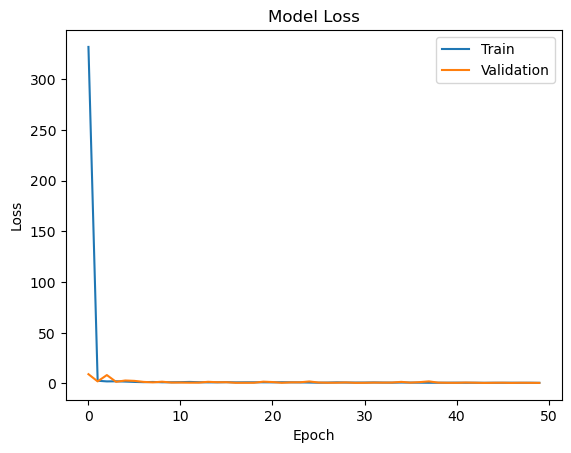

In [43]:
import matplotlib.pyplot as plt

# Print model history keys to see available data
print(model_history.history.keys())

# Plotting the training and validation loss
plt.plot(model_history.history['loss'])  # Training loss
plt.plot(model_history.history['val_loss'])  # Validation loss

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')

# Adding legend to distinguish training and validation loss
plt.legend(['Train', 'Validation'], loc='upper right')

# Show the plot
plt.show()


In [39]:
# Predict the test results
y_pred = Classifier.predict(X_test)

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred > 0.5)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Print confusion matrix and accuracy
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy * 100:.2f}%")



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Confusion Matrix:
[[1473  122]
 [ 371   34]]
Accuracy: 75.35%
